In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

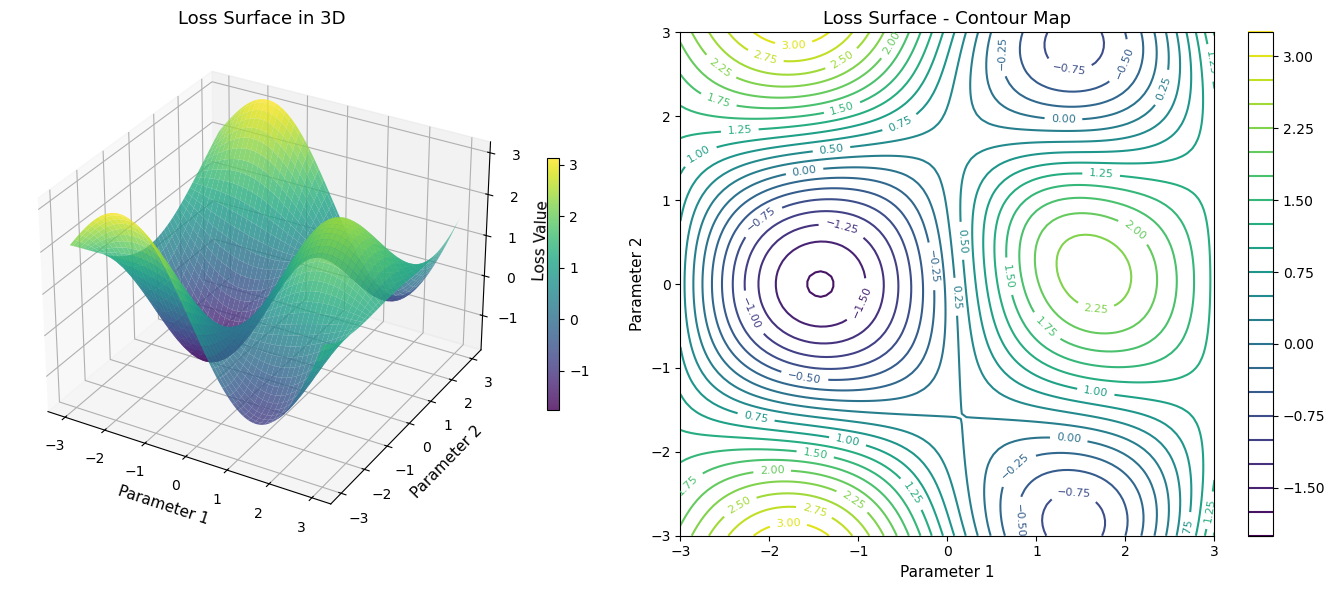

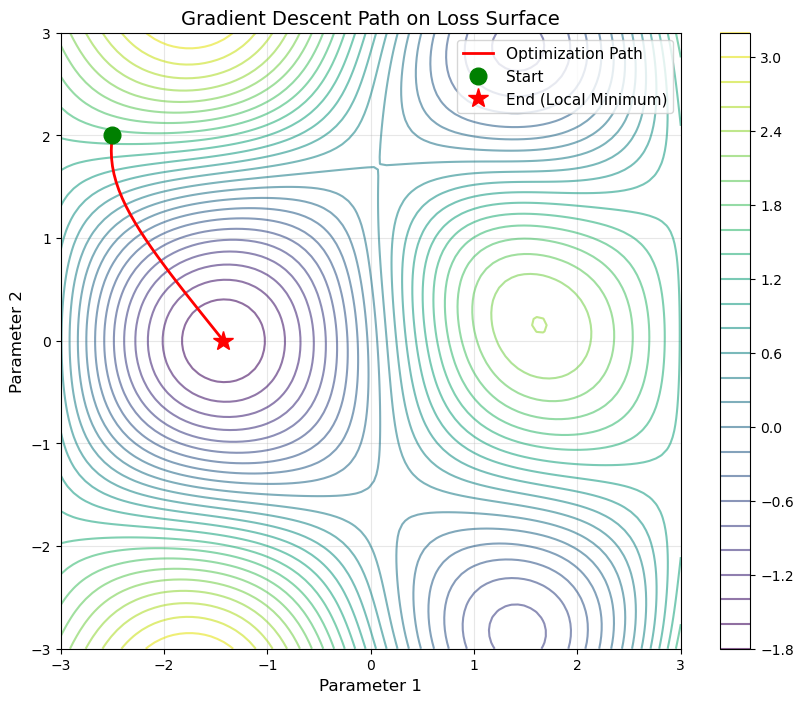

In [ ]:
# Create a 2D loss surface - imagine a model with just 2 parameters
param1 = np.linspace(-3, 3, 100)
param2 = np.linspace(-3, 3, 100)
P1, P2 = np.meshgrid(param1, param2)

# Define a loss function with multiple local minima
# This mimics real loss surfaces with complex structure
loss_surface = (P1**2 + P2**2) / 10 + \
               2 * np.sin(P1) * np.cos(P2) + \
               0.5 * np.exp(-((P1-1)**2 + (P2-1)**2))

# Create a 3D visualization
fig = plt.figure(figsize=(14, 6))

# First subplot: 3D surface
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(P1, P2, loss_surface, cmap='viridis', alpha=0.8)
ax1.set_xlabel('Parameter 1', fontsize=11)
ax1.set_ylabel('Parameter 2', fontsize=11)
ax1.set_zlabel('Loss Value', fontsize=11)
ax1.set_title('Loss Surface in 3D', fontsize=13)
fig.colorbar(surf, ax=ax1, shrink=0.5)

# Second subplot: Contour plot (top-down view)
ax2 = fig.add_subplot(122)
contour = ax2.contour(P1, P2, loss_surface, levels=20, cmap='viridis')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_xlabel('Parameter 1', fontsize=11)
ax2.set_ylabel('Parameter 2', fontsize=11)
ax2.set_title('Loss Surface - Contour Map', fontsize=13)
plt.colorbar(contour, ax=ax2)

plt.tight_layout()
plt.show()

# Now let's simulate an optimization path on this surface
# Starting from a random point
start_p1, start_p2 = -2.5, 2.0
learning_rate = 0.05
path_p1, path_p2 = [start_p1], [start_p2]

current_p1, current_p2 = start_p1, start_p2

for i in range(100):
    # Compute gradient (derivative of loss with respect to parameters)
    # This tells us which direction is "downhill"
    grad_p1 = current_p1/5 + 2*np.cos(current_p1)*np.cos(current_p2) + \
              (current_p1-1)*np.exp(-((current_p1-1)**2 + (current_p2-1)**2))
    grad_p2 = current_p2/5 - 2*np.sin(current_p1)*np.sin(current_p2) + \
              (current_p2-1)*np.exp(-((current_p1-1)**2 + (current_p2-1)**2))
    
    # Take a step in the direction opposite to gradient (downhill)
    current_p1 = current_p1 - learning_rate * grad_p1
    current_p2 = current_p2 - learning_rate * grad_p2
    
    path_p1.append(current_p1)
    path_p2.append(current_p2)

# Plot the optimization path on the contour map
plt.figure(figsize=(10, 8))
contour = plt.contour(P1, P2, loss_surface, levels=30, cmap='viridis', alpha=0.6)
plt.plot(path_p1, path_p2, 'r-', linewidth=2, label='Optimization Path')
plt.plot(path_p1[0], path_p2[0], 'go', markersize=12, label='Start')
plt.plot(path_p1[-1], path_p2[-1], 'r*', markersize=15, label='End (Local Minimum)')
plt.xlabel('Parameter 1', fontsize=12)
plt.ylabel('Parameter 2', fontsize=12)
plt.title('Gradient Descent Path on Loss Surface', fontsize=14)
plt.legend(fontsize=11)
plt.colorbar(contour)
plt.grid(True, alpha=0.3)
# plt.show()

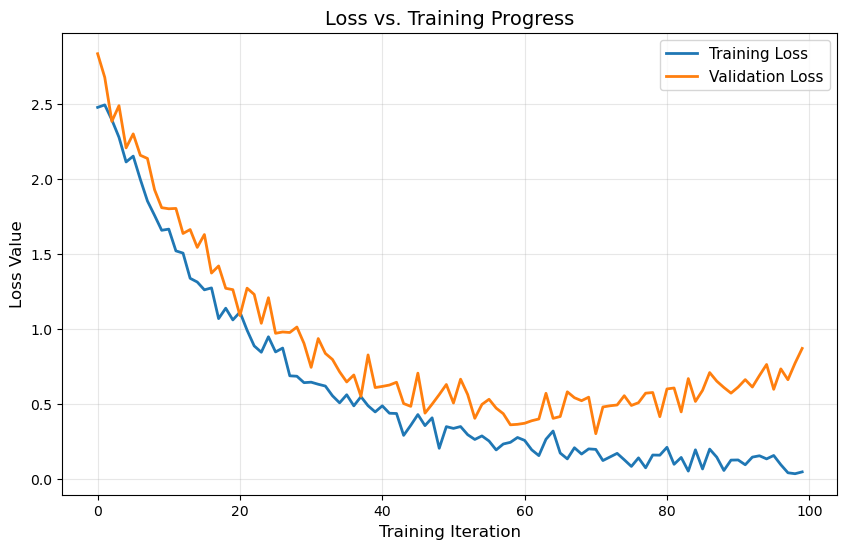

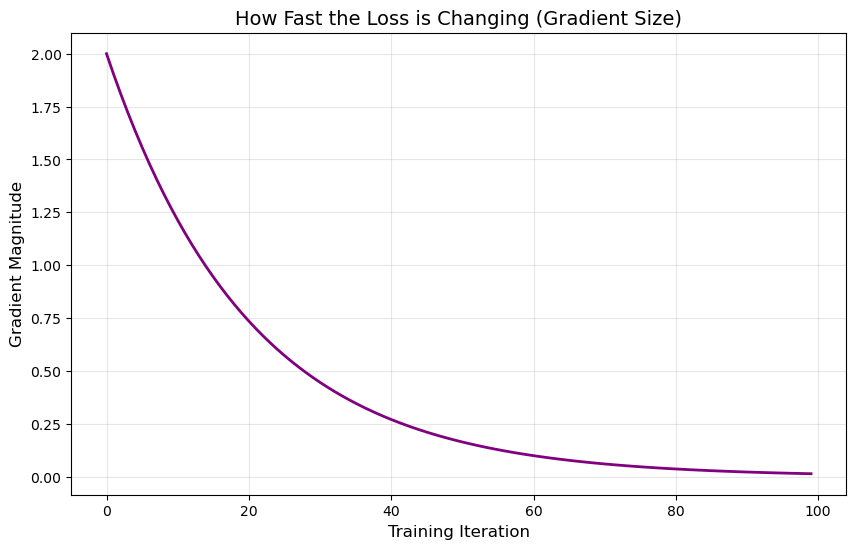

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate a training run where loss decreases over time
# This represents the journey through parameter space
iterations = np.arange(0, 100)
# Loss starts high and decreases, with some noise
training_loss = 2.5 * np.exp(-iterations/20) + 0.1 + 0.05 * np.random.randn(100)
validation_loss = 2.5 * np.exp(-iterations/20) + 0.3 + 0.08 * np.random.randn(100)

# After iteration 60, validation loss starts increasing (overfitting)
validation_loss[60:] = validation_loss[60:] + 0.01 * (iterations[60:] - 60)

plt.figure(figsize=(10, 6))
plt.plot(iterations, training_loss, label='Training Loss', linewidth=2)
plt.plot(iterations, validation_loss, label='Validation Loss', linewidth=2)
plt.xlabel('Training Iteration', fontsize=12)
plt.ylabel('Loss Value', fontsize=12)
plt.title('Loss vs. Training Progress', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

# The gradient magnitude also tells us something interesting
gradient_magnitude = 2.5 * np.exp(-iterations/20) * 0.8
plt.figure(figsize=(10, 6))
plt.plot(iterations, gradient_magnitude, color='purple', linewidth=2)
plt.xlabel('Training Iteration', fontsize=12)
plt.ylabel('Gradient Magnitude', fontsize=12)
plt.title('How Fast the Loss is Changing (Gradient Size)', fontsize=14)
plt.grid(True, alpha=0.3)
# plt.show()

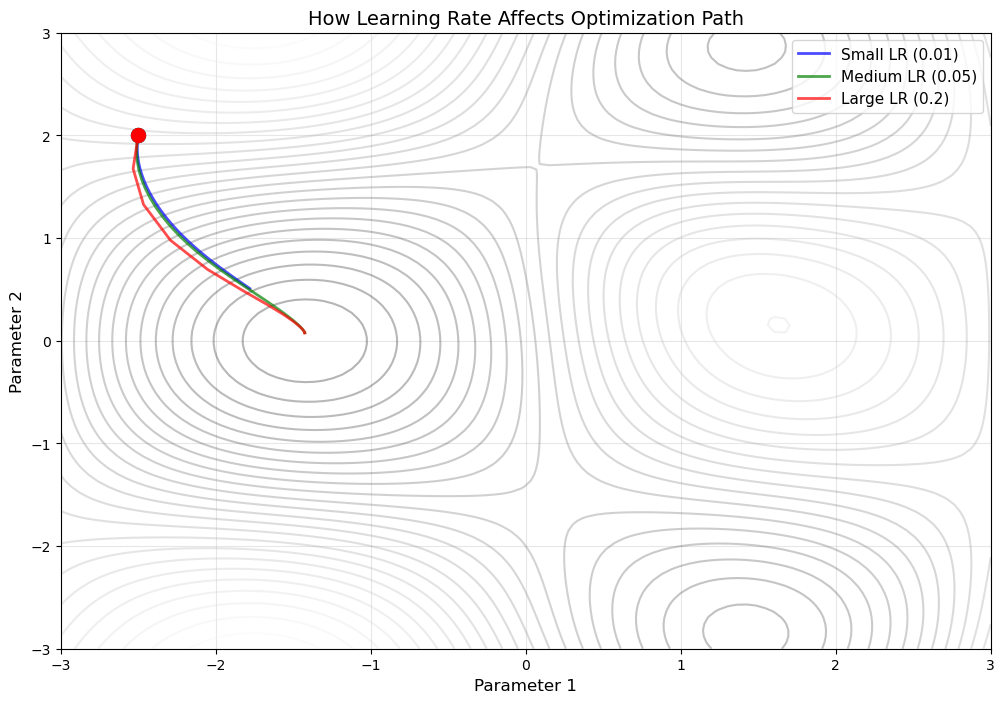

In [5]:
# Same loss surface as before
def compute_loss_and_grad(p1, p2):
    loss = (p1**2 + p2**2) / 10 + 2*np.sin(p1)*np.cos(p2) + \
           0.5*np.exp(-((p1-1)**2 + (p2-1)**2))
    grad_p1 = p1/5 + 2*np.cos(p1)*np.cos(p2) + \
              (p1-1)*np.exp(-((p1-1)**2 + (p2-1)**2))
    grad_p2 = p2/5 - 2*np.sin(p1)*np.sin(p2) + \
              (p2-1)*np.exp(-((p2-1)**2 + (p2-1)**2))
    return loss, grad_p1, grad_p2

# Try three different learning rates
learning_rates = [0.01, 0.05, 0.2]
colors = ['blue', 'green', 'red']
labels = ['Small LR (0.01)', 'Medium LR (0.05)', 'Large LR (0.2)']

plt.figure(figsize=(12, 8))
contour = plt.contour(P1, P2, loss_surface, levels=30, cmap='gray', alpha=0.3)

for lr, color, label in zip(learning_rates, colors, labels):
    current_p1, current_p2 = -2.5, 2.0
    path_p1, path_p2 = [current_p1], [current_p2]
    
    for i in range(100):
        loss, grad_p1, grad_p2 = compute_loss_and_grad(current_p1, current_p2)
        current_p1 = current_p1 - lr * grad_p1
        current_p2 = current_p2 - lr * grad_p2
        path_p1.append(current_p1)
        path_p2.append(current_p2)
    
    plt.plot(path_p1, path_p2, color=color, linewidth=2, 
             label=label, alpha=0.7)
    plt.plot(path_p1[0], path_p2[0], 'o', color=color, markersize=10)

plt.xlabel('Parameter 1', fontsize=12)
plt.ylabel('Parameter 2', fontsize=12)
plt.title('How Learning Rate Affects Optimization Path', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()